In [1]:
import numpy as np 
import pandas as pd 

In [2]:
PlayTennis=pd.read_csv('play_tennis.csv')
PlayTennis

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
PlayTennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [4]:
PlayTennis.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [5]:
PlayTennis.drop(['day'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['wind'] = Le.fit_transform(PlayTennis['wind'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])


In [7]:
x = PlayTennis.drop(['play'],axis=1)
y= PlayTennis['play']
x,y

(    outlook  temp  humidity  wind
 0         2     1         0     1
 1         2     1         0     0
 2         0     1         0     1
 3         1     2         0     1
 4         1     0         1     1
 5         1     0         1     0
 6         0     0         1     0
 7         2     2         0     1
 8         2     0         1     1
 9         1     2         1     1
 10        2     2         1     0
 11        0     2         0     0
 12        0     1         1     1
 13        1     2         0     0, 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: play, dtype: int64)

In [8]:
# Fitting the model
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion = 'entropy')
dt = dt.fit(x, y)
dt


DecisionTreeClassifier(criterion='entropy')

In [9]:
dt.score(x,y)

1.0

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

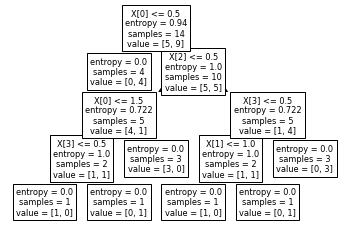

In [10]:
tree.plot_tree(dt)

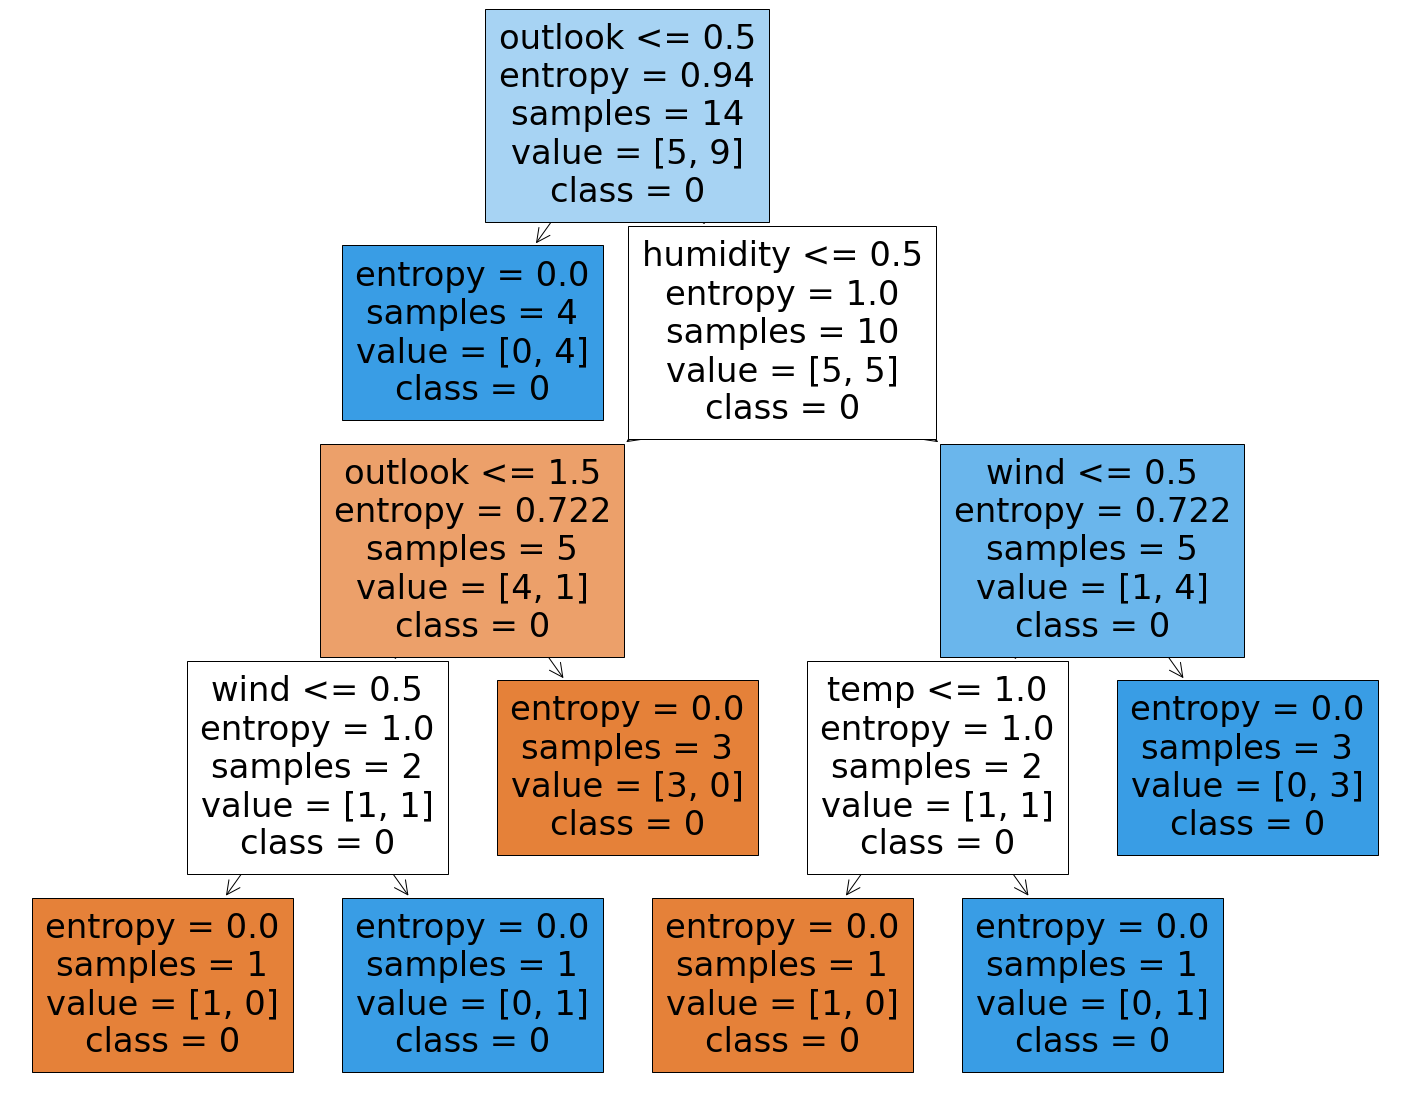

In [11]:
# Display the constructed tree.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
a= tree.plot_tree(dt,feature_names=x.columns,class_names=y.astype(str),filled=True)


In [12]:
new_df = pd.DataFrame({'outlook':2,
                      'temp':1,
                      'humidity':0,
                      'wind':1},index=[0])
new_df

,outlook,temp,humidity,wind
0,2,1,0,1


In [13]:
y_pred1 = dt.predict(new_df)
y_pred1

array([0])